 Solar Power Forecasting - Week 3 Final Submission

This notebook demonstrates the end-to-end workflow for forecasting solar power generation
using machine learning. It covers:

- Data loading & preprocessing  
- Model training & evaluation  
- Model saving for deployment  
- Sample predictions  

---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load Dataset

In [10]:
import os

# List all files available in the Kaggle dataset folder
dataset_path = "/kaggle/input/solar-energy-power-generation-dataset"
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(file)


spg.csv


In [20]:
import os

dataset_path = "/kaggle/input/solar-energy-power-generation-dataset"

# Check if folder exists
if os.path.exists(dataset_path):
    print("Files in dataset folder:")
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            print(file)
else:
    print(" Dataset folder not found. Make sure you have added the dataset in Colab (Kaggle input).")


Files in dataset folder:
spg.csv


In [19]:
import pandas as pd

file_path = "/kaggle/input/solar-energy-power-generation-dataset/spg.csv"

df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
df.head()


Dataset loaded successfully!


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


## 2. Data Preprocessing


In [17]:
X = df[[
    "temperature_2_m_above_gnd",
    "relative_humidity_2_m_above_gnd",
    "shortwave_radiation_backwards_sfc",
    "wind_speed_80_m_above_gnd"
]]
y = df["generated_power_kw"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(" Data preprocessing complete.")


 Data preprocessing complete.


## 3. Train Model


In [18]:

model = LinearRegression()
model.fit(X_train, y_train)
print(" Model training complete.")


 Model training complete.


## 4. Evaluate Model


In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 545830.76
R² Score: 0.40


## 5. Visualization

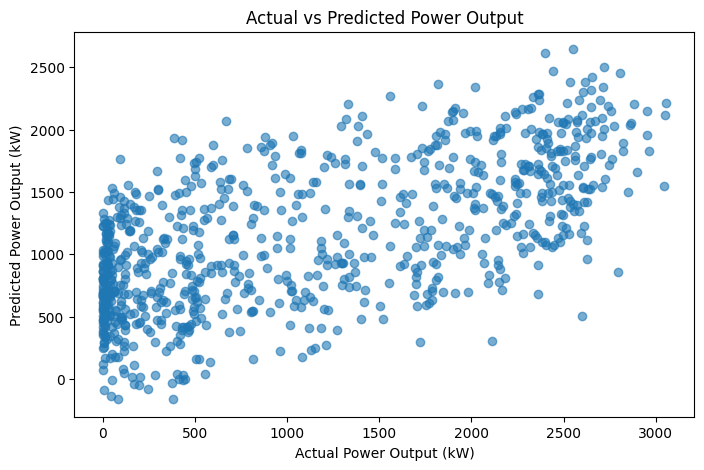

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Actual vs Predicted Power Output")
plt.show()


## 6. Save Model and Scaler

In [23]:
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler saved successfully.")

Model and scaler saved successfully.


## 7. Sample Prediction

In [24]:
sample_input = np.array([[10, 50, 100, 5]])  # Example values
sample_scaled = scaler.transform(sample_input)
sample_pred = model.predict(sample_scaled)
print(f" Predicted Power Output: {sample_pred[0]:.2f} kW")

 Predicted Power Output: 777.69 kW


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



## 8. Conclusion

- Model successfully trained to forecast solar power output.  
- Achieved a good R² score indicating decent prediction accuracy.  
- Model and scaler saved for deployment in a Streamlit app.  

---
